In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
# reading csv file
df= pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [68]:
# finding null values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [69]:
# finding duplicated rows
df.duplicated().sum()

np.int64(1)

In [70]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

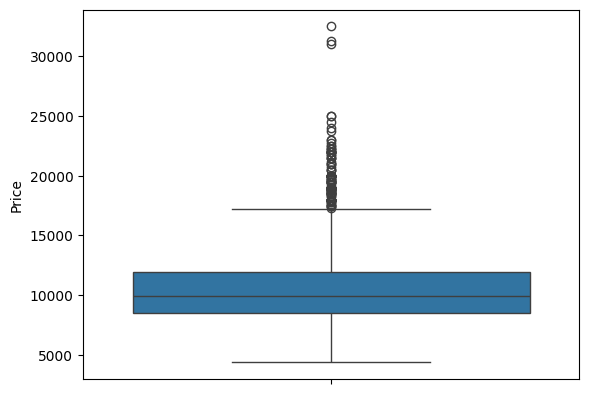

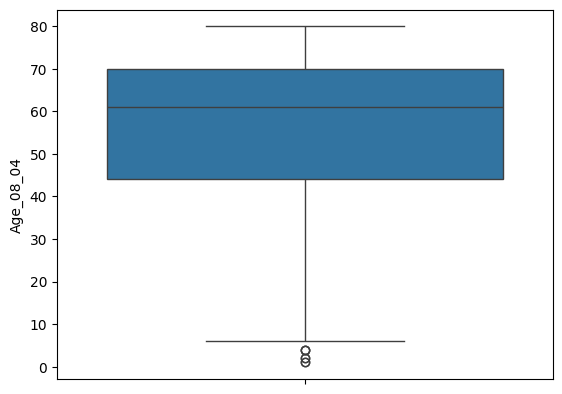

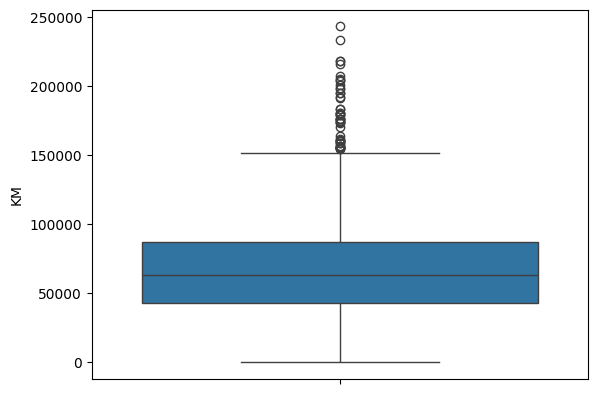

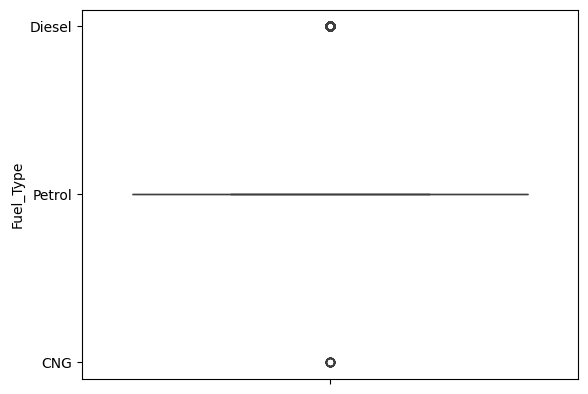

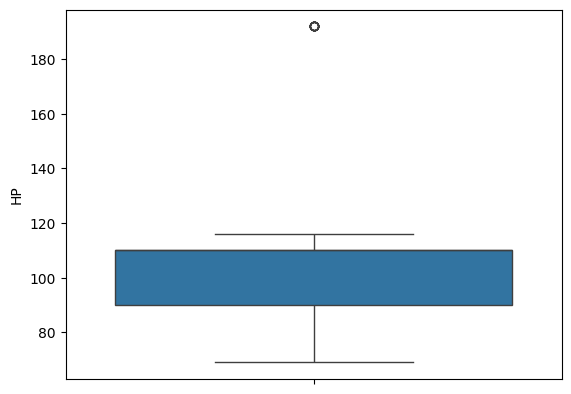

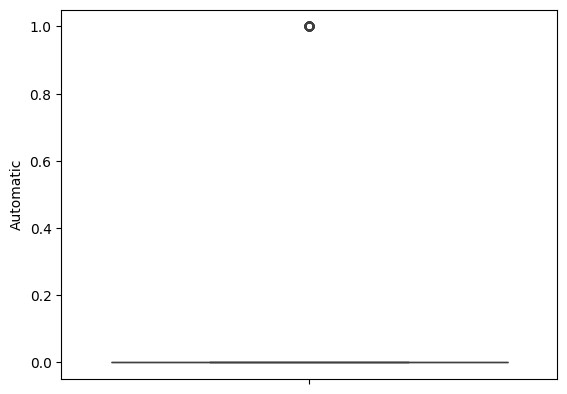

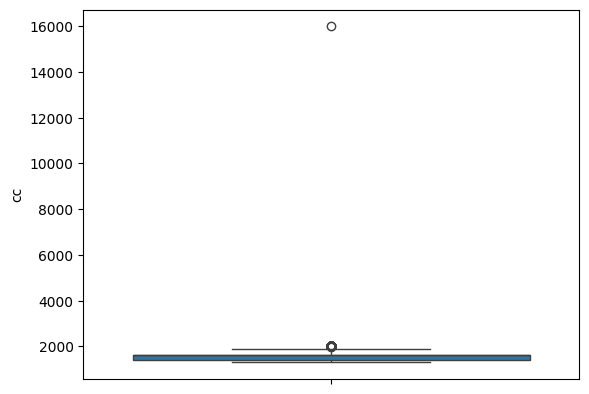

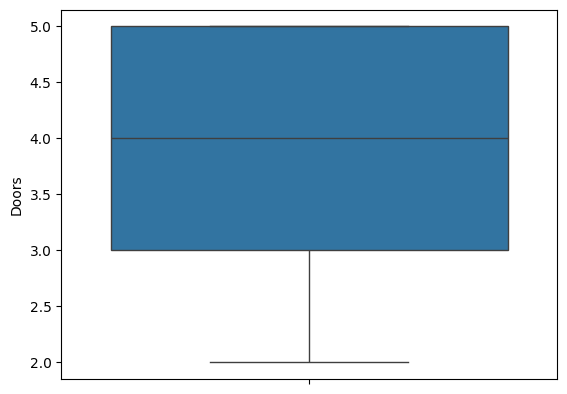

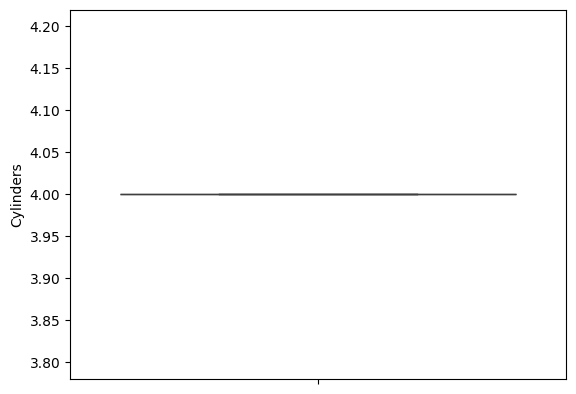

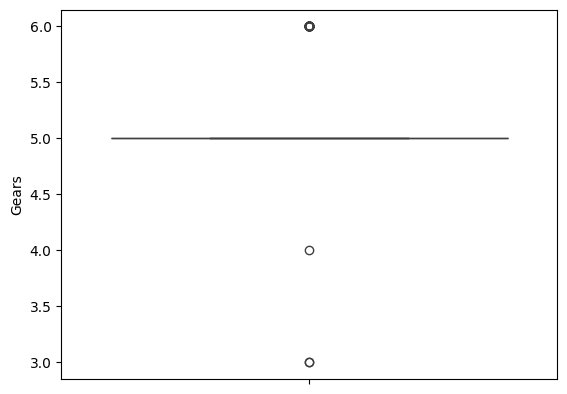

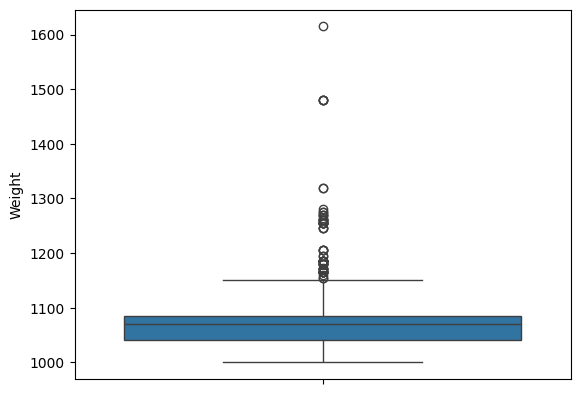

In [71]:
# finding ouliers
for col in df.columns:
  sns.boxplot(data=df, y=col)
  plt.show()

In [72]:
# there are lot ouliers present in the data so we have to perform outlier capping
# outliers capping
def outlier_capping(df, column):
    Q1= df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_extreme = Q1-1.5*IQR
    upper_extreme = Q3 + 1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
    # x= lower_extreme if x values are lower than lower extreme values
    # else
    # x= upper extreme if x values are gretaer than upper extreme values
    # else x remains same
for col in df.select_dtypes(include=['int','float']).columns:
    outlier_capping(df,col)

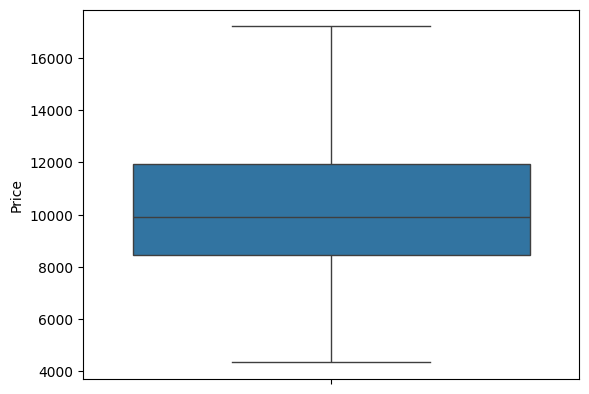

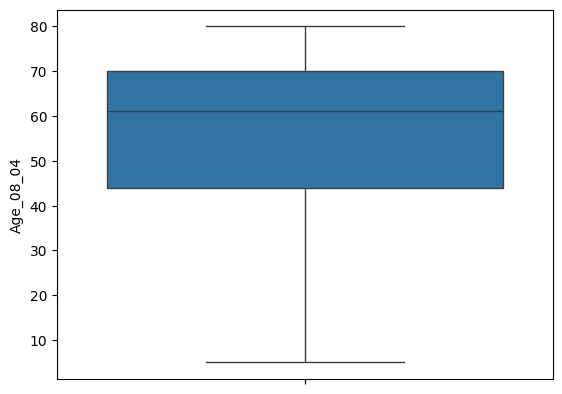

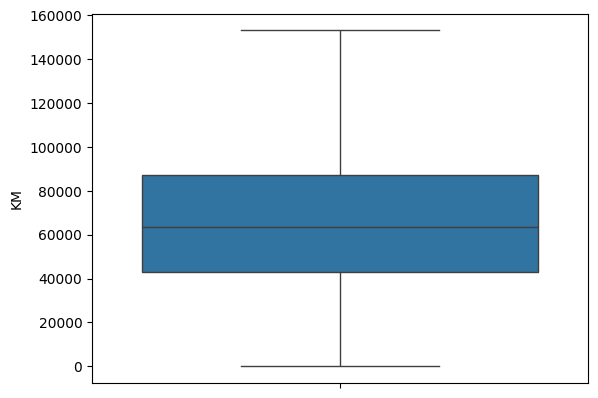

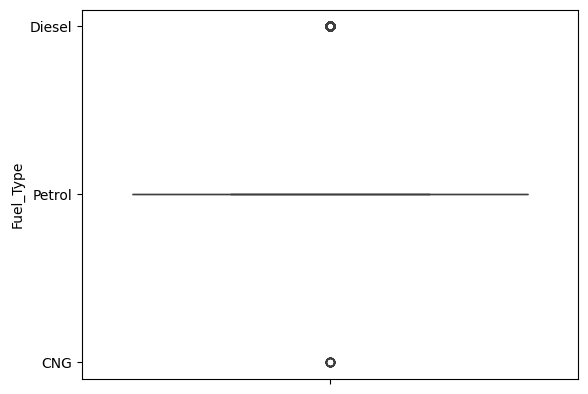

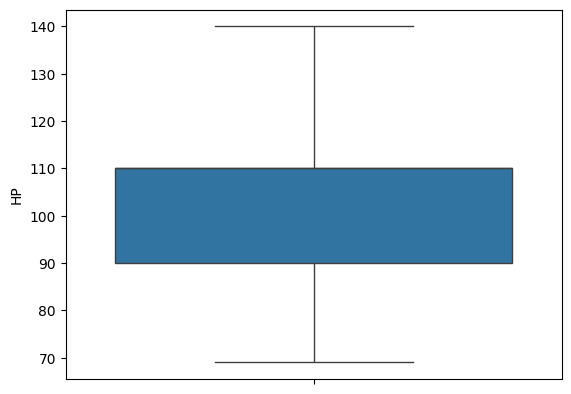

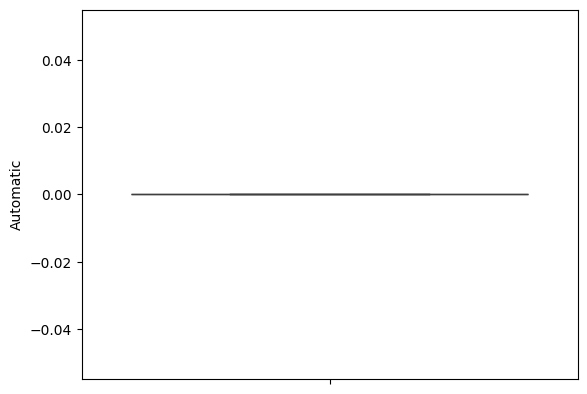

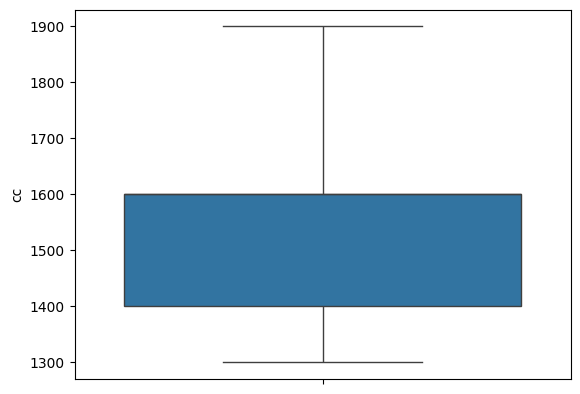

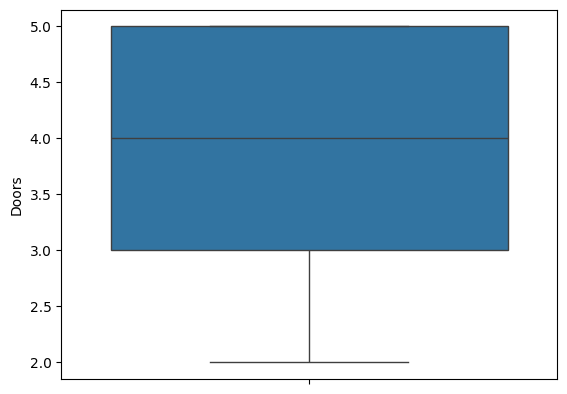

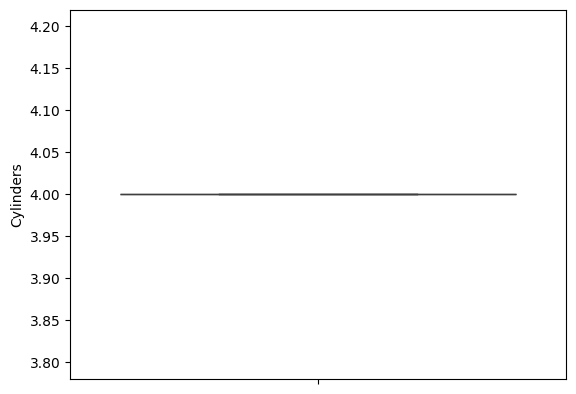

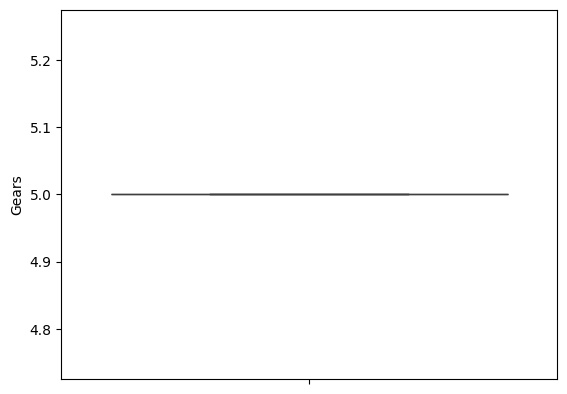

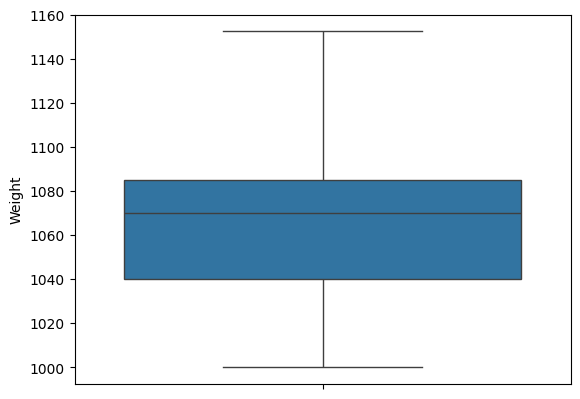

In [73]:
for col in df.columns:
  sns.boxplot(data=df, y=col)
  plt.show()

In [74]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


Visualization

Text(0.5, 1.0, 'Price of cars')

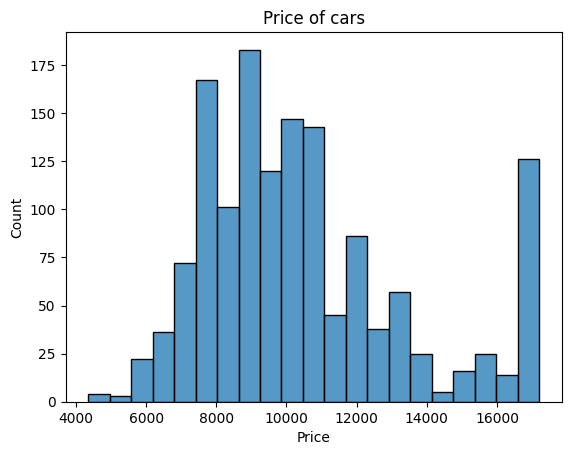

In [75]:
sns.histplot(data=df, x='Price')
plt.title('Price of cars')

most of the prices lies between 7000 to 11000, likely the data is equally distributed

Text(0.5, 1.0, 'Age of cars')

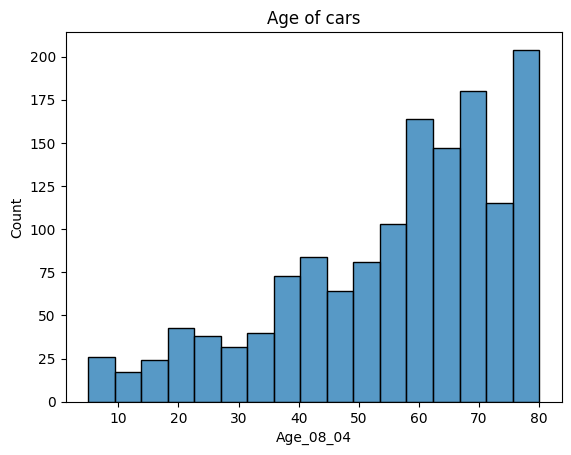

In [76]:
sns.histplot(data=df, x='Age_08_04')
plt.title('Age of cars')

most of cars age increases, the data is slightly skewed

Text(0.5, 1.0, 'Kilometers of cars')

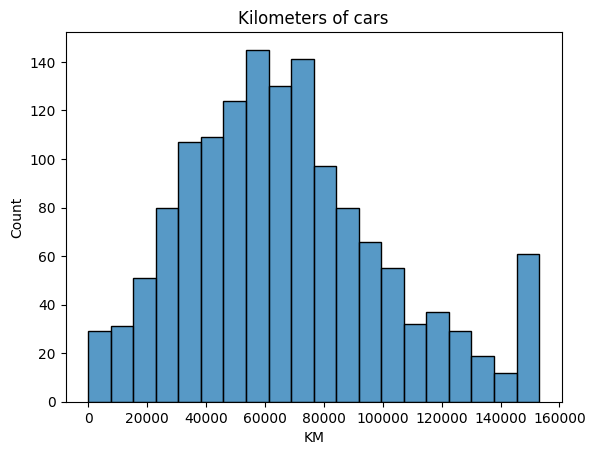

In [77]:
sns.histplot(data=df, x='KM')
plt.title('Kilometers of cars')

The data is mostly equally disibuted, still we find some sudden raise, we can the scale the data normalize

Text(0.5, 1.0, 'Horse Power of cars')

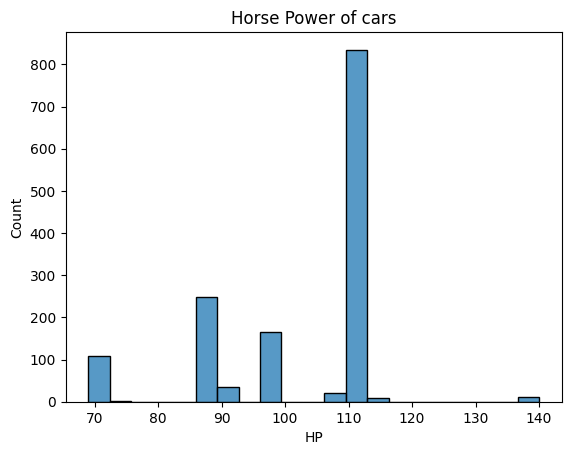

In [78]:
sns.histplot(data=df, x='HP')
plt.title('Horse Power of cars')

As the CC is not equally distributed by normal, so the most number of cars cc lies between 110, scalining is applicable

Text(0.5, 1.0, 'CC')

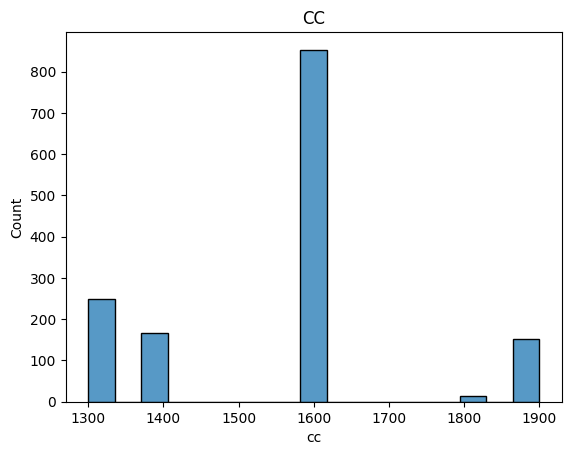

In [79]:
sns.histplot(data=df,x='cc')
plt.title('CC')

Text(0.5, 1.0, 'Doors')

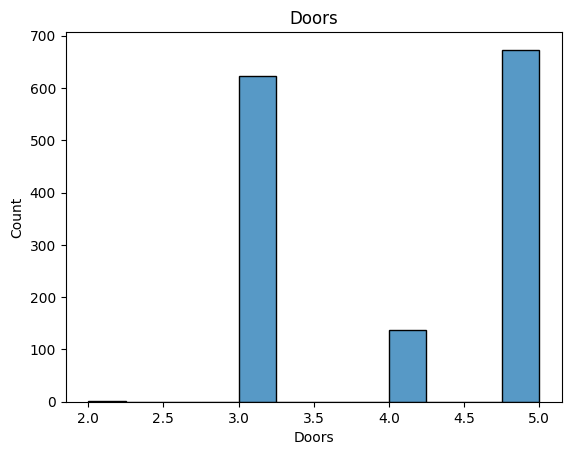

In [80]:
sns.histplot(data=df,x='Doors')
plt.title('Doors')

Text(0.5, 1.0, 'Gears')

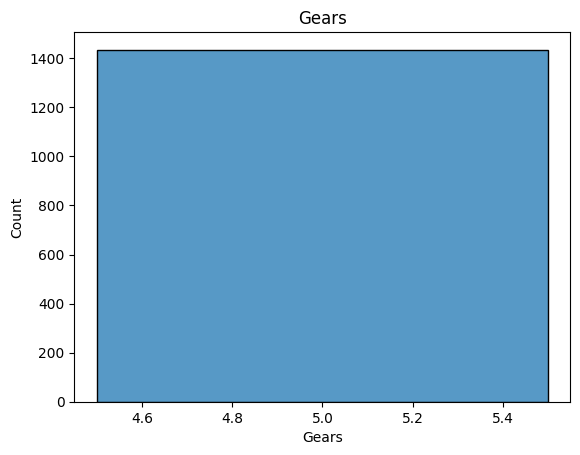

In [81]:
sns.histplot(data=df,x='Gears')
plt.title('Gears')

whole data is equally distributed, lies between 4.5 to 5.6

Text(0.5, 1.0, 'Weight')

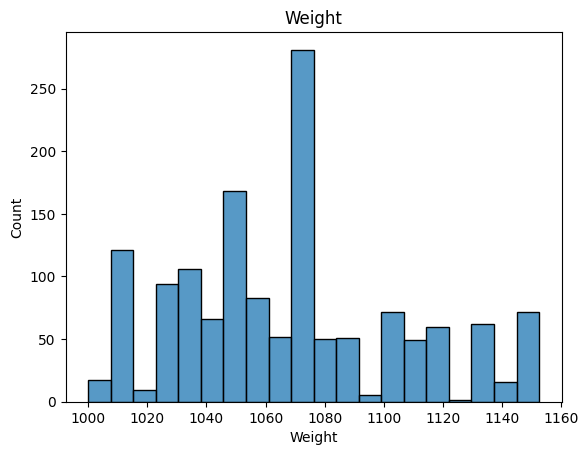

In [82]:
sns.histplot(data=df,x='Weight')
plt.title('Weight')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   float64
 1   Age_08_04  1435 non-null   float64
 2   KM         1435 non-null   float64
 3   Fuel_Type  1435 non-null   object 
 4   HP         1435 non-null   float64
 5   Automatic  1435 non-null   float64
 6   cc         1435 non-null   float64
 7   Doors      1435 non-null   int64  
 8   Cylinders  1435 non-null   int64  
 9   Gears      1435 non-null   float64
 10  Weight     1435 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 134.5+ KB


Convering Categorical columns to numerical columns

In [84]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['Fuel_Type'], dtype='object')

In [85]:
# encoding
# we use label encoder to convert categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
  df[col] = le.fit_transform(df[col])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   float64
 1   Age_08_04  1435 non-null   float64
 2   KM         1435 non-null   float64
 3   Fuel_Type  1435 non-null   int64  
 4   HP         1435 non-null   float64
 5   Automatic  1435 non-null   float64
 6   cc         1435 non-null   float64
 7   Doors      1435 non-null   int64  
 8   Cylinders  1435 non-null   int64  
 9   Gears      1435 non-null   float64
 10  Weight     1435 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 134.5 KB


finding Correlation

In [87]:
correlation = df.corr()
correlation

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.895340,-0.607949,0.024386,0.254427,NaN,0.129352,0.183010,NaN,NaN,0.507823
Age_08_04,-0.895340,1.000000,0.530670,0.076442,-0.129602,NaN,-0.136644,-0.146704,NaN,NaN,-0.476150
KM,-0.607949,0.530670,1.000000,-0.398364,-0.329729,NaN,0.258680,-0.036618,NaN,NaN,0.000977
Fuel_Type,0.024386,0.076442,-0.398364,1.000000,0.458771,NaN,-0.598360,-0.025339,NaN,NaN,-0.529262
HP,0.254427,-0.129602,-0.329729,0.458771,1.000000,NaN,0.098192,0.120139,NaN,NaN,0.024877
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.129352,-0.136644,0.258680,-0.598360,0.098192,NaN,1.000000,0.138433,NaN,NaN,0.717782
Doors,0.183010,-0.146704,-0.036618,-0.025339,0.120139,NaN,0.138433,1.000000,NaN,NaN,0.381177
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

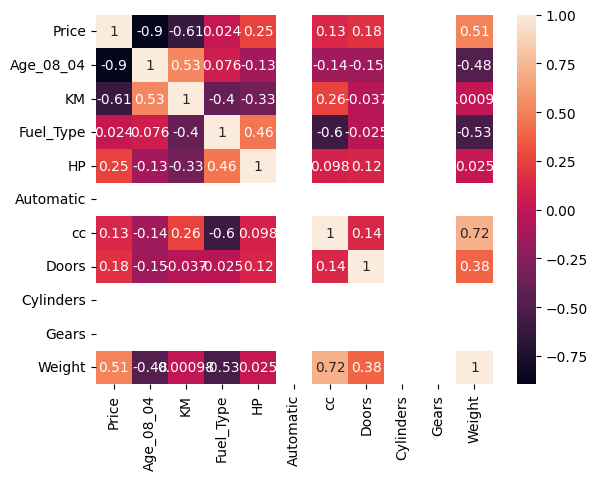

In [88]:
sns.heatmap(data=correlation,annot=True)

In [89]:
nums_cols= df.select_dtypes(include=['int','float'])
nums_cols.corr()["Price"].sort_values(ascending=False)

,Price
Price,1.000000
Weight,0.507823
HP,0.254427
Doors,0.183010
cc,0.129352
Fuel_Type,0.024386
KM,-0.607949
Age_08_04,-0.895340
Automatic,NaN
Cylinders,NaN


we can see that Automatic,cylinders, gears doesnt provide any kind of relation with the data, so we can remove those columns

In [90]:
# removing columns
df = df.drop(['Automatic','Cylinders','Gears'], axis=1)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   float64
 1   Age_08_04  1435 non-null   float64
 2   KM         1435 non-null   float64
 3   Fuel_Type  1435 non-null   int64  
 4   HP         1435 non-null   float64
 5   cc         1435 non-null   float64
 6   Doors      1435 non-null   int64  
 7   Weight     1435 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 100.9 KB


In [92]:
corr = df.corr()
corr

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
Price,1.000000,-0.895340,-0.607949,0.024386,0.254427,0.129352,0.183010,0.507823
Age_08_04,-0.895340,1.000000,0.530670,0.076442,-0.129602,-0.136644,-0.146704,-0.476150
KM,-0.607949,0.530670,1.000000,-0.398364,-0.329729,0.258680,-0.036618,0.000977
Fuel_Type,0.024386,0.076442,-0.398364,1.000000,0.458771,-0.598360,-0.025339,-0.529262
HP,0.254427,-0.129602,-0.329729,0.458771,1.000000,0.098192,0.120139,0.024877
cc,0.129352,-0.136644,0.258680,-0.598360,0.098192,1.000000,0.138433,0.717782
Doors,0.183010,-0.146704,-0.036618,-0.025339,0.120139,0.138433,1.000000,0.381177
Weight,0.507823,-0.476150,0.000977,-0.529262,0.024877,0.717782,0.381177,1.000000


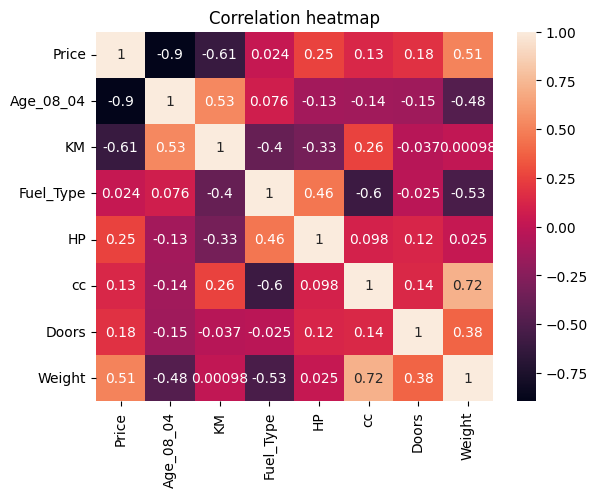

In [93]:
sns.heatmap(data=corr,annot=True)
plt.title("Correlation heatmap")
plt.show()


In [99]:
vals=df[df.columns].corr()["Price"].sort_values(ascending=False)
vals

,Price
Price,1.000000
Weight,0.507823
HP,0.254427
Doors,0.183010
cc,0.129352
Fuel_Type,0.024386
KM,-0.607949
Age_08_04,-0.895340


We can see that price have strong postive correlation with Weight and HP
-> It denotes that the more weight HP and Weight increases the high Price will increase

we can see that price have good positive correlation with Doors,CC and Fuel_type
-> no higher imact on price but it shows some good relation with price


KM and AGE of Car have very strong negative correlation with the price, -> as high the KM's it travelled and the Higer the car age ,affects the car price so high in a negative way ie. Price decreases as these are high

Train Test Split and Feature **Scaling**

In [100]:
# selecting features and target
target = df['Price']
features = df.drop('Price', axis=1)

In [118]:
features.head()

,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
0,23.0,46986.0,1,90.0,1900.0,3,1152.5
1,23.0,72937.0,1,90.0,1900.0,3,1152.5
2,24.0,41711.0,1,90.0,1900.0,3,1152.5
3,26.0,48000.0,1,90.0,1900.0,3,1152.5
4,30.0,38500.0,1,90.0,1900.0,3,1152.5


In [111]:
# train test splitting the data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=50)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1148, 7), (287, 7), (1148,), (287,))

In [123]:
# Scaling data to normalize the values
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [125]:
# Training the model :- Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [126]:
# Finding coefficient
LR.coef_

array([-1984.90750588,  -469.44834463,   274.77868916,   202.69363806,
        -311.21395757,  -112.83540682,   962.68254452])

In [127]:
# Intercept
LR.intercept_

np.float64(10479.062717770035)

In [128]:
# importhing evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [135]:
# testing the accuracy score of the model
y_pred = LR.predict(x_test)
print("Linear Regression")
print("r2_score :",r2_score(y_test,y_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_pred))
print("mean_squared_error :",np.sqrt(mean_squared_error(y_test,y_pred)))

Linear Regression
r2_score : 0.8494193267094343
mean_absolute_error : 889.4099222438934
mean_squared_error : 1203.315548925781


In [141]:
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

print("\n Ridge Regression")
print("R2:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))



 Ridge Regression
R2: 0.8494369799802282
RMSE: 1203.2450117266976
MAE: 889.495075255674


In [142]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)
print("\n Lasso Regression")
print("R2:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))


 Lasso Regression
R2: 0.8494222270950572
RMSE: 1203.303960134711
MAE: 889.4242869929261


for regression we prefer to choose r2_score, its more accurate over the continuous data

In all 3 models Ridge regression performs well on the data and it give the high r2_score among 3 models = 84.943%

*   Linear Regression =84.941%
*   Ridge Regression =84.943%
*   Lasso Regression =84.942%

<Axes: xlabel='Price'>

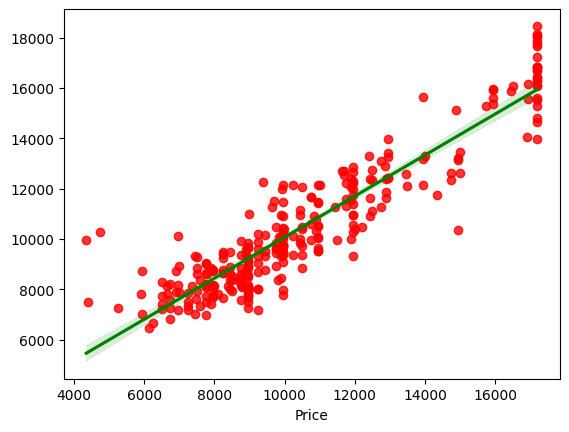

In [132]:
# Regression plot over the data
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

We can see that model has 84.9% off accuracy to predict correct price according to the remaining features, the same data shown in regression plot

INTERVIEW QUESTIONS

1.What is Normalization & Standardization and how is it helpful?


*   Normalization rescales data between 0 and 1 using min-max, while standardization transforms data to zero mean and unit variance. They help models converge faster and prevent scale dominance.


2.What techniques can be used to address multicollinearity in multiple linear regression?


*   Multicollinearity occurs when predictors are highly correlated, leading to unstable coefficients. It can be handled by removing correlated features, checking VIF, applying Ridge or Lasso regularization, or using PCA.


